# Kvalitet podataka

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Učitaćemo dataset koji će nam biti neophodan za demonstraciju. Zatim ćemo prikazati neke osnovne informacije o datasetu.

In [68]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.drop(["Z_CostContact", "Z_Revenue", "Dt_Customer"], axis="columns", inplace=True)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

   Recency  MntWines  MntFruits  ...  NumCatalogPurchases  NumStorePurchases  \
0       58       635         88  ...                   10    

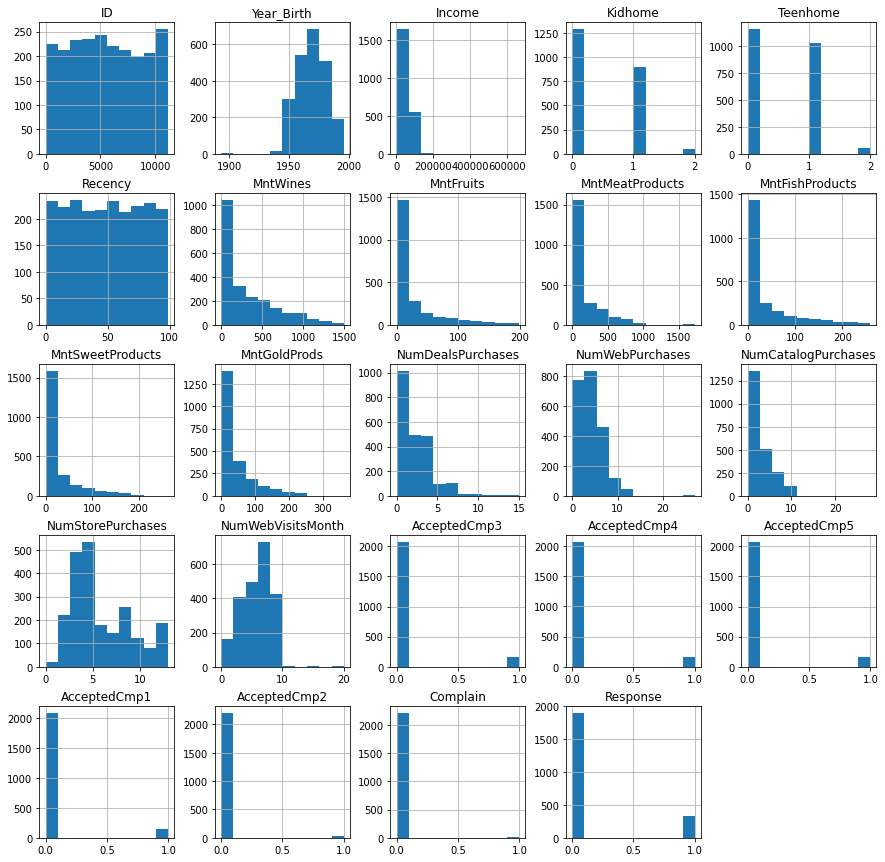

In [69]:
print(customer_data.head(10))
print(customer_data.info())

customer_data.hist(figsize=(15,15))
plt.show()

## Tipovi atributa u dataset-u

U ovom dataset-u, imamo (X je skraćeni zapis za sve kolone odgovarajućeg oblika):
- Nominalne atribute: "Marital_Status"
- Binarne atribute: kolone "AcceptedCmpX", "Complain", "Response"
- Ordinalne atribute: "Education"
- Numeričke atribute zasnovane na intervalima: "Year_Birth"
- Numeričke atribute zasnovane na razmeri: "Income", "Kidhome", "Teenhome", "MntX", "NumX", "Recency"

Pošto su svi binarni atributi u dataset-u asimetrični (stanje označeno sa 1 je bitnije/poželjnije od onog označenog nulom), transformisaćemo kolone "Kidhome" i "Teenhome" u binarne, tako što ćemo sa 1 označiti domaćinstva u kojima deca/tinejdžeri žive, a sa 0 ona u kojima ne žive. Ni jedno od ovih stanja nije poželjnije od drugog, tako da će ovo biti simetrični binarni atributi.

In [70]:
customer_data["Kidhome"] = [1 if x > 0 else 0 for x in customer_data["Kidhome"]]
customer_data["Teenhome"] = [1 if x > 0 else 0 for x in customer_data["Teenhome"]]

Kada je u pitanju podela podataka na diskretne i kontinualne, ovde imamo primere i jednih i drugih, i to:
- Diskretni: "Marital_Status", "Education"...
- Kontinualni: "Income"...

## Transformacija numeričkih podataka u ordinalne

U radu, napomenuli smo da se ordinalni atributi mogu dobiti diskretizacijom numeričkih podataka na konačan broj opsega vrednosti. Kako bismo ovo pokazali, transformisaćemo kolonu "Recency" tako da oznaka 0 označava osobe koje su sajt posetile u poslednjih 30 dana, oznaka 1 osobe koje su sajt posetile u poslednjih 60 dana i oznaka 2 one koji su sajt posetili pre više od 60 dana.

In [71]:
customer_data["Recency"] = [0 if x <=30 else 1 if  (30 < x and x <=60) else 2 for x in customer_data["Recency"]]

print(customer_data.head(10))
print(customer_data.info())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

   Recency  MntWines  MntFruits  ...  NumCatalogPurchases  NumStorePurchases  \
0        1       635         88  ...                   10    

## Mere centralne tendencije

Za numberičke podatke u datasetu, izračunaćemo sve u radu pomenute mere centranle tendencije:
- Aritmetičku sredinu
- Medijalnu vrednost
- Mod podataka
- Srednji opseg podataka

Za nominalne vrednosti izračunaćemo samo mod podataka, jer ostale mere nemaju smisla. Izuzetak je ordinalni podatak "Education", za koji ćemo izračunati i medijalnu vrednost. Za kolonu "ID" nećemo računati ni jednu od ovih vrednosti, jer je jedina operacija koja ima smisla nad ovim atributom poređenje jednakosti.

In [72]:
numerical_data = customer_data[["Income","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", 
                                "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Year_Birth"]]
nominal_data = customer_data[["Kidhome", "Teenhome", "Recency", "Response", "Complain", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Education", "Marital_Status"]]

Sada ćemo prikazati mere centralne tendencije za numeričke podatke:

In [73]:
print(numerical_data.mean())

Income                 52247.251354
MntWines                 303.935714
MntFruits                 26.302232
MntMeatProducts          166.950000
MntFishProducts           37.525446
MntSweetProducts          27.062946
MntGoldProds              44.021875
NumDealsPurchases          2.325000
NumWebPurchases            4.084821
NumCatalogPurchases        2.662054
NumStorePurchases          5.790179
NumWebVisitsMonth          5.316518
Year_Birth              1968.805804
dtype: float64


U radu, pomenuli smo da je moguće računati i težinsku srednju vrednost podataka. Ovo ćemo demonstrirati tako što ćemo izračunati srednju vrednost kolone "Income", ali tako da je težina onih korisnika koji su sajt posetili u zadnjih trideset dana 1, a ostalih korisnika 0 (u prevodu, računamo srednju vrednost kolone "Income" za korisnike koji su sajt posetili u zadnjih 30 dana).

In [74]:
income_mean_recent_users = np.sum((customer_data["Recency"] == 0) * customer_data["Income"]) / np.sum(customer_data["Recency"] == 0)
print(income_mean_recent_users)

52587.2955801105


Pomenuli smo i da je aritmetička sredina mera centralne tendencije koja je jako osetljiva na ekstremne vrednosti. Demostriraćemo to na koloni "Income", tako što ćemo uporediti aritmetičku sredinu ovog atributa na celom dataset-u, i na delu podataka koji su manji od 100000. Može se primetiti ne mala razlika u dobijenim vrednostima.

In [75]:
print("Na celom dataset-u: ", customer_data["Income"].mean())
income_mean_no_outliers = np.sum((customer_data["Income"] < 100000) * customer_data["Income"]) / np.sum(customer_data["Income"] < 100000)
print("Bez ekstremnih vrednosti: ", income_mean_no_outliers)
print("Razlika: ", customer_data["Income"].mean() - income_mean_no_outliers)

Na celom dataset-u:  52247.25135379061
Bez ekstremnih vrednosti:  51512.04993191103
Razlika:  735.2014218795812


In [76]:
print(numerical_data.median())

Income                 51381.5
MntWines                 173.5
MntFruits                  8.0
MntMeatProducts           67.0
MntFishProducts           12.0
MntSweetProducts           8.0
MntGoldProds              24.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        2.0
NumStorePurchases          5.0
NumWebVisitsMonth          6.0
Year_Birth              1970.0
dtype: float64


Na koloni "Income" demonstriraćemo kako je moguće aproksimirati medijalnu vrednost atributa, za slučajeve kada ima mnogo podataka u dataset-u, pa je operacija traženja medijalne vrednosti skupa.

Prvo ćemo podeliti vrednosti atributa "Income" u 4 grupe:

In [77]:
income_1 = customer_data["Income"][customer_data["Income"] <= 20000]
income_2 = customer_data["Income"][np.logical_and(customer_data["Income"] > 20000, customer_data["Income"] <= 60000)]
income_3 = customer_data["Income"][np.logical_and(customer_data["Income"] >= 60000, customer_data["Income"] <= 80000)]
income_4 = customer_data["Income"][customer_data["Income"] > 80000]

Odštampaćemo broj vrednosti unutar svakog od ovih skupova, kako bismo videli koji od njih predstavlja medijalni interval, odnosno onaj interval koji sadrži medijalnu vrednost.

In [78]:
print(len(income_1))
print(len(income_2))
print(len(income_3))
print(len(income_4))
print("Ukupan broj podataka podeljen sa 2: ", len(customer_data["Income"])/2)

127
1248
625
217
Ukupan broj podataka podeljen sa 2:  1120.0


Možemo zaključiti da će se medijalna vrednost atributa nalaziti u skupu 2. Sada ćemo, na odnovu formule, aproksimirati medijalnu vrednost.

In [79]:
income_median = np.min(income_2) + ((len(customer_data["Income"]) / 2 - len(income_1)) / len(income_2)) * (np.max(income_2) - np.min(income_2))
print("Aproksimirana vrednost: ", income_median)
print("Stvarna vrednost:", customer_data["Income"].median())

Aproksimirana vrednost:  51853.48557692308
Stvarna vrednost: 51381.5


Iako se vrednosti ne poklapaju, nisu daleko jedna od druge.

In [80]:
print(numerical_data.mode())

   Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  7500.0         2          0                7                0   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                 0             1                  1                2   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Year_Birth  
0                    0                  3                  7        1976  


Sada ćemo prikazati mod nominalnih atributa.

In [81]:
print(nominal_data.mode())

   Kidhome  Teenhome  Recency  Response  Complain  AcceptedCmp1  AcceptedCmp2  \
0        0         0        2         0         0             0             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5   Education Marital_Status  
0             0             0             0  Graduation        Married  


Prikazaćemo i srednji opseg numeričkih podataka:

In [82]:
print((numerical_data.max() + numerical_data.min())/2)

Income                 334198.0
MntWines                  746.5
MntFruits                  99.5
MntMeatProducts           862.5
MntFishProducts           129.5
MntSweetProducts          131.5
MntGoldProds              181.0
NumDealsPurchases           7.5
NumWebPurchases            13.5
NumCatalogPurchases        14.0
NumStorePurchases           6.5
NumWebVisitsMonth          10.0
Year_Birth               1944.5
dtype: float64


Pošto je "Education" ordinalni atribut, vrednosti unutar ove kolone konvertovaćemo u vrednosti koje odgovaraju rangu te vrednosti (od najnižeg ka najvišem obrazovanju) i za ovakve vrednosti izračunati i medijalnu vrednost podatka.

In [83]:
education = np.zeros(len(customer_data["Education"]))
education[customer_data["Education"] == "Basic"] = 1
education[customer_data["Education"] == "2n Cycle"] = 2
education[customer_data["Education"] == "Graduation"] = 3
education[customer_data["Education"] == "Master"] = 4
education[customer_data["Education"] == "PhD"] = 5

In [84]:
print(np.median(education))

3.0


Pošto je dobijena medijalna vrednost ceo broj, možemo zaključiti da je medijalna vrednost ovog atributa zapravo "Graduation". Da smo dobili razlomljenu vrednost, to bi značilo da medijana ovog atributa nije dobro definisana.

## Mere disperzije podataka

Za numeričke podatke računaćemo i:
- Opseg
- Kvartile
- Interkvartilni opseg
- Five-number summary
- Varijansu
- Standardnu devijaciju

Prvo ćemo za ove podatke izračunati opseg.

In [85]:
print(numerical_data.max() - numerical_data.min())

Income                 664936.0
MntWines                 1493.0
MntFruits                 199.0
MntMeatProducts          1725.0
MntFishProducts           259.0
MntSweetProducts          263.0
MntGoldProds              362.0
NumDealsPurchases          15.0
NumWebPurchases            27.0
NumCatalogPurchases        28.0
NumStorePurchases          13.0
NumWebVisitsMonth          20.0
Year_Birth                103.0
dtype: float64


Kvartili su na sledećem prikazu označeni sa 25, 50 i 75%. Standardna devijacija je označena sa std. Poslednjih 5 brojeva u tebeli (od min do max) predstavlja five-number summary.

In [86]:
print(numerical_data.describe())

              Income     MntWines    MntFruits  MntMeatProducts  \
count    2216.000000  2240.000000  2240.000000      2240.000000   
mean    52247.251354   303.935714    26.302232       166.950000   
std     25173.076661   336.597393    39.773434       225.715373   
min      1730.000000     0.000000     0.000000         0.000000   
25%     35303.000000    23.750000     1.000000        16.000000   
50%     51381.500000   173.500000     8.000000        67.000000   
75%     68522.000000   504.250000    33.000000       232.000000   
max    666666.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%        

Odštampaćemo five-number summary preglednije.

In [87]:
for column in numerical_data.columns:
    print(column, "{", numerical_data[column].min(), numerical_data[column].quantile(0.25), numerical_data[column].median(), numerical_data[column].quantile(0.75), numerical_data[column].max(), "}")

Income { 1730.0 35303.0 51381.5 68522.0 666666.0 }
MntWines { 0 23.75 173.5 504.25 1493 }
MntFruits { 0 1.0 8.0 33.0 199 }
MntMeatProducts { 0 16.0 67.0 232.0 1725 }
MntFishProducts { 0 3.0 12.0 50.0 259 }
MntSweetProducts { 0 1.0 8.0 33.0 263 }
MntGoldProds { 0 9.0 24.0 56.0 362 }
NumDealsPurchases { 0 1.0 2.0 3.0 15 }
NumWebPurchases { 0 2.0 4.0 6.0 27 }
NumCatalogPurchases { 0 0.0 2.0 4.0 28 }
NumStorePurchases { 0 3.0 5.0 8.0 13 }
NumWebVisitsMonth { 0 3.0 6.0 7.0 20 }
Year_Birth { 1893 1959.0 1970.0 1977.0 1996 }


Izračunaćemo i interkvartilni opseg svake od kolona.

In [88]:
for column in numerical_data.columns:
    print(column, ":", numerical_data[column].quantile(0.75) - numerical_data[column].quantile(0.25))

Income : 33219.0
MntWines : 480.5
MntFruits : 32.0
MntMeatProducts : 216.0
MntFishProducts : 47.0
MntSweetProducts : 32.0
MntGoldProds : 47.0
NumDealsPurchases : 2.0
NumWebPurchases : 4.0
NumCatalogPurchases : 4.0
NumStorePurchases : 5.0
NumWebVisitsMonth : 4.0
Year_Birth : 18.0


Za numeričke kolone, konstruisaćemo i boxplot dijagrame.

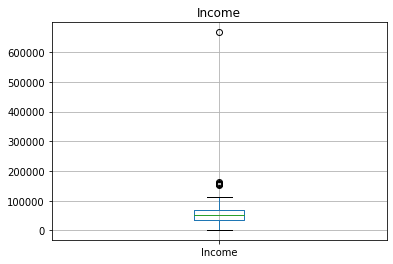

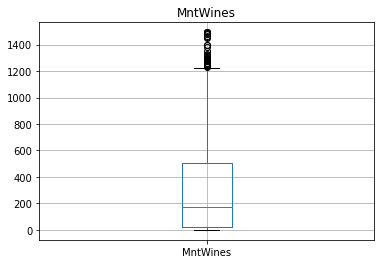

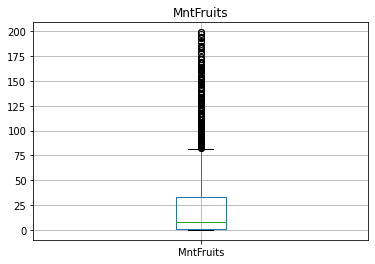

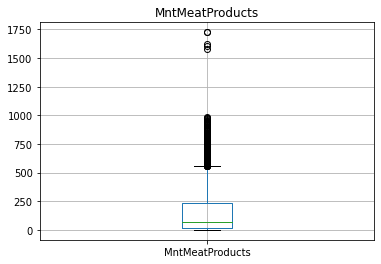

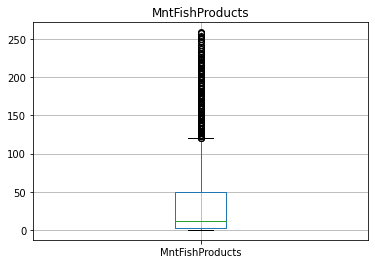

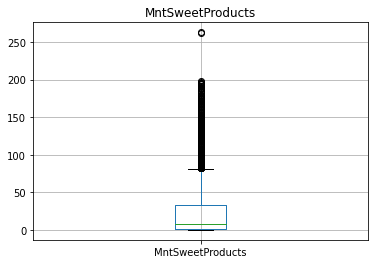

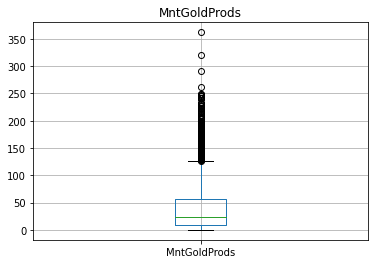

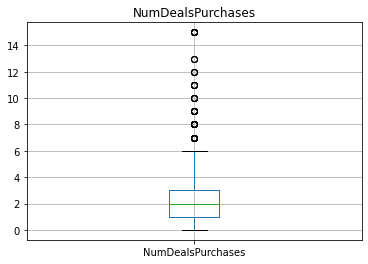

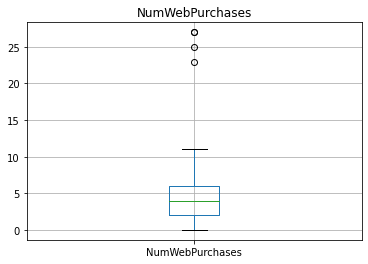

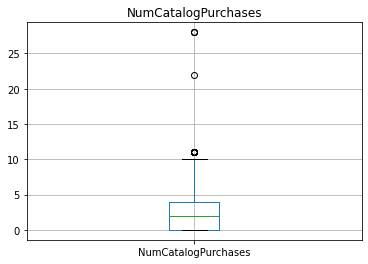

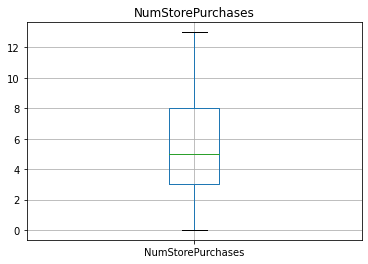

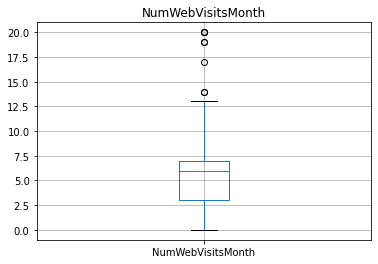

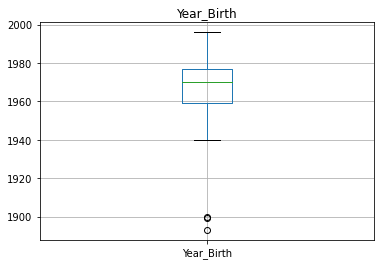

In [89]:
for column in numerical_data.columns:
    plt.title(column)
    numerical_data.boxplot(column = column)
    plt.show()

Varijansa predstavlja kvadrat standardne devijacije i biće prikazana ispod:

In [90]:
print(numerical_data.std() ** 2)

Income                 6.336838e+08
MntWines               1.132978e+05
MntFruits              1.581926e+03
MntMeatProducts        5.094743e+04
MntFishProducts        2.984325e+03
MntSweetProducts       1.704080e+03
MntGoldProds           2.721442e+03
NumDealsPurchases      3.733542e+00
NumWebPurchases        7.721252e+00
NumCatalogPurchases    8.544517e+00
NumStorePurchases      1.056873e+01
NumWebVisitsMonth      5.888606e+00
Year_Birth             1.436179e+02
dtype: float64


## Mere oblika distribucije podataka

U nastavku, za numeričke podatke računaćemo još i:
- Iskošenost
- Kurtozis

Prvo ćemo računati apsolutne mere iskošenosti. Iako ove vrednosti nisu relevantne jer su teške za poređenje i, samim tim nepraktične, računaćemo ih radi demonstracije. 

Prvi način računanja apsolutne mere iskošenosti:

In [91]:
for column in numerical_data.columns:
    print(column, ":", numerical_data[column].mean() - numerical_data[column].median())

Income : 865.7513537906125
MntWines : 130.4357142857143
MntFruits : 18.302232142857143
MntMeatProducts : 99.94999999999999
MntFishProducts : 25.525446428571428
MntSweetProducts : 19.06294642857143
MntGoldProds : 20.021875
NumDealsPurchases : 0.3250000000000002
NumWebPurchases : 0.08482142857142883
NumCatalogPurchases : 0.6620535714285714
NumStorePurchases : 0.7901785714285712
NumWebVisitsMonth : -0.6834821428571427
Year_Birth : -1.1941964285713311


Drugi način računanja apsolutne mere iskošenosti:

In [92]:
for column in numerical_data.columns:
    print(column, ":", numerical_data[column].mean() - numerical_data[column].mode()[0])

Income : 44747.25135379061
MntWines : 301.9357142857143
MntFruits : 26.302232142857143
MntMeatProducts : 159.95
MntFishProducts : 37.52544642857143
MntSweetProducts : 27.06294642857143
MntGoldProds : 43.021875
NumDealsPurchases : 1.3250000000000002
NumWebPurchases : 2.084821428571429
NumCatalogPurchases : 2.6620535714285714
NumStorePurchases : 2.790178571428571
NumWebVisitsMonth : -1.6834821428571427
Year_Birth : -7.194196428571331


Treći način računanja apsolutne mere iskošenosti:

In [93]:
for column in numerical_data.columns:
    print(column, ":", numerical_data[column].quantile(0.25) + numerical_data[column].quantile(0.75) - 2 * numerical_data[column].median())

Income : 1062.0
MntWines : 181.0
MntFruits : 18.0
MntMeatProducts : 114.0
MntFishProducts : 29.0
MntSweetProducts : 18.0
MntGoldProds : 17.0
NumDealsPurchases : 0.0
NumWebPurchases : 0.0
NumCatalogPurchases : 0.0
NumStorePurchases : 1.0
NumWebVisitsMonth : -2.0
Year_Birth : -4.0


Sada ćemo računati relativne mere iskošenosti atributa.

Prvo ćemo računati Karl Person koeficijent:

In [94]:
for column in numerical_data.columns:
    print(column, ":", (numerical_data[column].mean() - numerical_data[column].mode()[0]) / numerical_data[column].std())

Income : 1.7775837239351693
MntWines : 0.8970233308958071
MntFruits : 0.6613015184593241
MntMeatProducts : 0.708635828477615
MntFishProducts : 0.686914652968868
MntSweetProducts : 0.6555867157595874
MntGoldProds : 0.8246882709749411
NumDealsPurchases : 0.6857335081288024
NumWebPurchases : 0.7502827991612923
NumCatalogPurchases : 0.9106951436597133
NumStorePurchases : 0.8582634553880824
NumWebVisitsMonth : -0.6937488327438601
Year_Birth : -0.6003133121393649


Iako ovde nema multimodalnih atributa i Karl Personov koeficijent je definisan i po ovoj formuli, izračunaćemo ga i po drugoj formuli, koja je predviđena da bude definisana nad podacima bez obzira na njihovu modalnost:

In [95]:
for column in numerical_data.columns:
    print(column, ":", 3 * (numerical_data[column].mean() - numerical_data[column].median()) / numerical_data[column].std())

Income : 0.10317586905878173
MntWines : 1.1625376531538172
MntFruits : 1.3804867025956977
MntMeatProducts : 1.3284429707346848
MntFishProducts : 1.4017530644491583
MntSweetProducts : 1.3853718191542603
MntGoldProds : 1.151400686889616
NumDealsPurchases : 0.5045963550381756
NumWebPurchases : 0.09157627313103593
NumCatalogPurchases : 0.6794705172131585
NumStorePurchases : 0.7291806316977146
NumWebVisitsMonth : -0.8449717286641604
Year_Birth : -0.2989459714500822


Zatim ćemo računati Boulijev koeficijent:

In [96]:
for column in numerical_data.columns:
    print(column, ":", (numerical_data[column].quantile(0.25) + numerical_data[column].quantile(0.75) - 2 * numerical_data[column].median()) / (numerical_data[column].quantile(0.75) - numerical_data[column].quantile(0.25)))

Income : 0.03196965591980493
MntWines : 0.37669094693028093
MntFruits : 0.5625
MntMeatProducts : 0.5277777777777778
MntFishProducts : 0.6170212765957447
MntSweetProducts : 0.5625
MntGoldProds : 0.3617021276595745
NumDealsPurchases : 0.0
NumWebPurchases : 0.0
NumCatalogPurchases : 0.0
NumStorePurchases : 0.2
NumWebVisitsMonth : -0.5
Year_Birth : -0.2222222222222222


I konačno ćemo izračunati Kelijev koeficijent:

In [97]:
for column in numerical_data.columns:
    print(column, ":", numerical_data[column].quantile(0.90) + numerical_data[column].quantile(0.10) - 2 * numerical_data[column].quantile(0.5))

Income : 1198.5
MntWines : 481.10000000000014
MntFruits : 67.0
MntMeatProducts : 372.0
MntFishProducts : 96.0
MntSweetProducts : 73.0
MntGoldProds : 77.0
NumDealsPurchases : 2.0
NumWebPurchases : 1.0
NumCatalogPurchases : 3.0
NumStorePurchases : 3.0
NumWebVisitsMonth : -2.0
Year_Birth : -4.0


Izračunaćemo i kurtozis podataka, kao i njihov excess kurtozis:

In [98]:
# Kurtozis
for column in numerical_data.columns:
    kurtosis = np.sum((numerical_data[column] - numerical_data[column].mean()) ** 4) / (len(numerical_data[column]) * (numerical_data[column].std() ** 4))
    print(column, ":", kurtosis)

Income : 160.39052444069551
MntWines : 3.5915217067031446
MntFruits : 7.032978514307352
MntMeatProducts : 8.49415115762831
MntFishProducts : 6.0814426137521185
MntSweetProducts : 7.357534278502943
MntGoldProds : 6.535269932644493
NumDealsPurchases : 11.903665544685408
NumWebPurchases : 8.679973575412374
NumCatalogPurchases : 11.016964441587303
NumStorePurchases : 2.374540433860779
NumWebVisitsMonth : 4.810574855384311
Year_Birth : 3.709871978633605


In [99]:
# Excess kurtozis
for column in numerical_data.columns:
    kurtosis = np.sum((numerical_data[column] - numerical_data[column].mean()) ** 4) / (len(numerical_data[column]) * (numerical_data[column].std() ** 4)) - 3
    print(column, ":", kurtosis)

Income : 157.39052444069551
MntWines : 0.5915217067031446
MntFruits : 4.032978514307352
MntMeatProducts : 5.494151157628311
MntFishProducts : 3.0814426137521185
MntSweetProducts : 4.357534278502943
MntGoldProds : 3.5352699326444927
NumDealsPurchases : 8.903665544685408
NumWebPurchases : 5.679973575412374
NumCatalogPurchases : 8.016964441587303
NumStorePurchases : -0.625459566139221
NumWebVisitsMonth : 1.8105748553843108
Year_Birth : 0.709871978633605


Na osnovu dobijenih kurtozisa, može se zaključiti da su atributi "Income", "MntX", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumWebVisitsMonth" i "YearBirth"  leptokutrični, dok je atribut "NumStorePurchases" platikurtičan. Najpribližniji normalnoj raspodeli su "MntWines" i "NumStorePurchases".

## Mere sličnosti podataka

U ovom odeljku sveske prvo ćemo računati sličnosti/različitosti između objekata koristeći podskupove odgovarajućih atributa (istog tipa), a onda ćemo izračunati sličnosti i različitosti između objekata koristeći sve njihove atribute. Sa dissim će biti označene mere različitosti, a sa sim sličnosti između objekata. Ove mere biće računate između svakog para objekata i predstavljene u vidu matrica.

### Nominalni atributi

Posmatrani dataset ima samo jedan nominalni atribut - kolonu "Marital_Status".

In [100]:
nominal_data = customer_data["Marital_Status"]

dissim_nominal = np.zeros((len(nominal_data), len(nominal_data))).astype(np.float64)

for i in range(len(nominal_data)):
    for j in range(i + 1, len(nominal_data)):
        dissim = (1 - int(nominal_data[i] == nominal_data[j])) / 1 #ispostovana je formula za vise atributa, iako se radi sa jednim
        dissim_nominal[i, j] = dissim
        dissim_nominal[j, i] = dissim

sim_nominal = 1 - dissim_nominal

print("Matrica različitosti:")
print(dissim_nominal)
print("Matrica sličnosti:")
print(sim_nominal)

Matrica različitosti:
[[0. 0. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 0. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 0. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
Matrica sličnosti:
[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Binarni atributi

Ovde ćemo računati dve sličnosti/različitosti: između objekata predstavljenih samo pomoću simetričnih binarnih atributa, i između onih predstavljenih asimetričnim binarnim atributima. Prvo će se za svaki par izračunati contigency matrix, koja će biti predstavljena kao niz dužine 4, u kom će redom ići vrednosti q, r, s i t (referencirati se na seminarski).

#### Simetrični binarni atributi

Pored atributa "Kidhome" i "Teenhome" koji su simetrični binarni atributi, da bismo demonstrirali i ovu mogućnost, transformisaćemo nominalni atribut "Marital_Status" u odgovarajući broj simetričnih binarnih atributa gde će svaki atribut odgovarati jednom stanju nominalnog atributa.

In [101]:
symmetric_binary_data = customer_data[["Kidhome", "Teenhome"]].to_numpy()
symmetric_binary_data = np.concatenate((symmetric_binary_data, pd.get_dummies(customer_data[["Marital_Status"]], columns=["Marital_Status"]).to_numpy()), axis=-1)

contigency_matrices_sym = np.zeros((len(customer_data), len(customer_data), 4))
dissim_symmetric_binary = np.zeros((len(customer_data), len(customer_data))).astype(np.float64)

for i in range(len(customer_data)):
    for j in range (i, len(customer_data)):
        q = 0
        r = 0
        s = 0
        t = 0

        for k in range(symmetric_binary_data.shape[-1]):
            if symmetric_binary_data[i, k] == symmetric_binary_data[j, k] and symmetric_binary_data[i, k] == 1:
                q = q + 1
            elif symmetric_binary_data[i, k] == symmetric_binary_data[i, k] and symmetric_binary_data[i, k] == 0:
                t = t + 1
            elif symmetric_binary_data[i, k] == 1:
                r = r + 1
            else:
                s = s + 1
            
        contigency_matrices_sym[i, j] = np.array([q, r, s, t])
        contigency_matrices_sym[j, i] = np.array([q, s, r, t])

        dissim_symmetric_binary[i, j] = (r + s) / (q + r + s + t)
        dissim_symmetric_binary[j, i] = dissim_symmetric_binary[i, j]

sim_symmetric_binary = 1 - dissim_symmetric_binary

print("Matrica slučaja: ")
print(contigency_matrices_sym)
print("Matrica različitosti:")
print(dissim_symmetric_binary)
print("Matrica sličnosti:")
print(sim_symmetric_binary)

Matrica slučaja: 
[[[1. 0. 0. 9.]
  [1. 0. 0. 9.]
  [0. 1. 0. 9.]
  ...
  [0. 1. 0. 9.]
  [0. 1. 0. 9.]
  [0. 1. 0. 9.]]

 [[1. 0. 0. 9.]
  [3. 0. 0. 7.]
  [0. 3. 0. 7.]
  ...
  [0. 3. 0. 7.]
  [1. 2. 0. 7.]
  [2. 1. 0. 7.]]

 [[0. 0. 1. 9.]
  [0. 0. 3. 7.]
  [1. 0. 0. 9.]
  ...
  [0. 1. 0. 9.]
  [1. 0. 0. 9.]
  [0. 1. 0. 9.]]

 ...

 [[0. 0. 1. 9.]
  [0. 0. 3. 7.]
  [0. 0. 1. 9.]
  ...
  [1. 0. 0. 9.]
  [0. 1. 0. 9.]
  [0. 1. 0. 9.]]

 [[0. 0. 1. 9.]
  [1. 0. 2. 7.]
  [1. 0. 0. 9.]
  ...
  [0. 0. 1. 9.]
  [2. 0. 0. 8.]
  [1. 1. 0. 8.]]

 [[0. 0. 1. 9.]
  [2. 0. 1. 7.]
  [0. 0. 1. 9.]
  ...
  [0. 0. 1. 9.]
  [1. 0. 1. 8.]
  [3. 0. 0. 7.]]]
Matrica različitosti:
[[0.  0.  0.1 ... 0.1 0.1 0.1]
 [0.  0.  0.3 ... 0.3 0.2 0.1]
 [0.1 0.3 0.  ... 0.1 0.  0.1]
 ...
 [0.1 0.3 0.1 ... 0.  0.1 0.1]
 [0.1 0.2 0.  ... 0.1 0.  0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0. ]]
Matrica sličnosti:
[[1.  1.  0.9 ... 0.9 0.9 0.9]
 [1.  1.  0.7 ... 0.7 0.8 0.9]
 [0.9 0.7 1.  ... 0.9 1.  0.9]
 ...
 [0.9 0.7 0.9 ... 1. 

#### Asimetrični binarni atributi

In [102]:
asymmetric_binary_data = customer_data[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]].to_numpy()
asymmetric_binary_data = np.concatenate((asymmetric_binary_data, pd.get_dummies(customer_data[["Marital_Status"]], columns=["Marital_Status"]).to_numpy()), axis=-1)

contigency_matrices_asym = np.zeros((len(customer_data), len(customer_data), 4))
dissim_asymmetric_binary = np.zeros((len(customer_data), len(customer_data))).astype(np.float64)

for i in range(len(customer_data)):
    for j in range (i, len(customer_data)):
        q = 0
        r = 0
        s = 0
        t = 0

        for k in range(asymmetric_binary_data.shape[-1]):
            if asymmetric_binary_data[i, k] == asymmetric_binary_data[j, k] and asymmetric_binary_data[i, k] == 1:
                q = q + 1
            elif asymmetric_binary_data[i, k] == asymmetric_binary_data[i, k] and asymmetric_binary_data[i, k] == 0:
                t = t + 1
            elif asymmetric_binary_data[i, k] == 1:
                r = r + 1
            else:
                s = s + 1
            
        contigency_matrices_asym[i, j] = np.array([q, r, s, t])
        contigency_matrices_asym[j, i] = np.array([q, s, r, t])

        dissim_asymmetric_binary[i, j] = (r + s) / (q + r + s )
        dissim_asymmetric_binary[j, i] = dissim_asymmetric_binary[i, j]

sim_asymmetric_binary = 1 - dissim_asymmetric_binary

print("Matrica slučaja: ")
print(contigency_matrices_asym)
print("Matrica različitosti:")
print(dissim_asymmetric_binary)
print("Matrica sličnosti:")
print(sim_asymmetric_binary)

Matrica slučaja: 
[[[ 2.  0.  0. 13.]
  [ 1.  1.  0. 13.]
  [ 0.  2.  0. 13.]
  ...
  [ 0.  2.  0. 13.]
  [ 0.  2.  0. 13.]
  [ 1.  1.  0. 13.]]

 [[ 1.  0.  1. 13.]
  [ 1.  0.  0. 14.]
  [ 0.  1.  0. 14.]
  ...
  [ 0.  1.  0. 14.]
  [ 0.  1.  0. 14.]
  [ 0.  1.  0. 14.]]

 [[ 0.  0.  2. 13.]
  [ 0.  0.  1. 14.]
  [ 1.  0.  0. 14.]
  ...
  [ 0.  1.  0. 14.]
  [ 1.  0.  0. 14.]
  [ 0.  1.  0. 14.]]

 ...

 [[ 0.  0.  2. 13.]
  [ 0.  0.  1. 14.]
  [ 0.  0.  1. 14.]
  ...
  [ 2.  0.  0. 13.]
  [ 0.  2.  0. 13.]
  [ 0.  2.  0. 13.]]

 [[ 0.  0.  2. 13.]
  [ 0.  0.  1. 14.]
  [ 1.  0.  0. 14.]
  ...
  [ 0.  0.  2. 13.]
  [ 1.  0.  0. 14.]
  [ 0.  1.  0. 14.]]

 [[ 1.  0.  1. 13.]
  [ 0.  0.  1. 14.]
  [ 0.  0.  1. 14.]
  ...
  [ 0.  0.  2. 13.]
  [ 0.  0.  1. 14.]
  [ 2.  0.  0. 13.]]]
Matrica različitosti:
[[0.  0.5 1.  ... 1.  1.  0.5]
 [0.5 0.  1.  ... 1.  1.  1. ]
 [1.  1.  0.  ... 1.  0.  1. ]
 ...
 [1.  1.  1.  ... 0.  1.  1. ]
 [1.  1.  0.  ... 1.  0.  1. ]
 [0.5 1.  1.  ... 1.  1.  

### Numerički atributi

Pre računanja distanci, normalizovaćemo vrednost svih atributa na opseg [0, 1] radi demonstracije. Koristićemo L2 distancu.

In [106]:
numeric_data = customer_data[numerical_data.columns].to_numpy()
numeric_data = (numeric_data - np.min(numeric_data, axis=0)) / (np.max(numeric_data, axis=0) - np.min(numeric_data, axis=0))

dissim_numeric = np.zeros((len(customer_data), len(customer_data)))

for i in range(len(customer_data)):
    for j in range(i+1, len(customer_data)):
        dissim_numeric[i, j] = np.linalg.norm((numeric_data[i] - numeric_data[j]))
        dissim_numeric[j, i] = dissim_numeric[i, j]

sim_numeric = 1 - dissim_numeric

print("Matrica različitosti:")
print(dissim_asymmetric_binary)
print("Matrica sličnosti:")
print(sim_asymmetric_binary)

Matrica različitosti:
[[0.  0.5 1.  ... 1.  1.  0.5]
 [0.5 0.  1.  ... 1.  1.  1. ]
 [1.  1.  0.  ... 1.  0.  1. ]
 ...
 [1.  1.  1.  ... 0.  1.  1. ]
 [1.  1.  0.  ... 1.  0.  1. ]
 [0.5 1.  1.  ... 1.  1.  0. ]]
Matrica sličnosti:
[[1.  0.5 0.  ... 0.  0.  0.5]
 [0.5 1.  0.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.  1.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.  0. ]
 [0.  0.  1.  ... 0.  1.  0. ]
 [0.5 0.  0.  ... 0.  0.  1. ]]


### Ordinalni atributi

U dataset-u imamo jedan ordinalni atrinut - "Education"

In [108]:
ordinal_data = np.zeros(len(customer_data["Education"]))
ordinal_data[customer_data["Education"] == "Basic"] = 1
ordinal_data[customer_data["Education"] == "2n Cycle"] = 2
ordinal_data[customer_data["Education"] == "Graduation"] = 3
ordinal_data[customer_data["Education"] == "Master"] = 4
ordinal_data[customer_data["Education"] == "PhD"] = 5

ordinal_data = (ordinal_data - 1) / 5

dissim_ordinal = np.zeros((len(customer_data), len(customer_data)))

for i in range(len(customer_data)):
    for j in range(i+1, len(customer_data)):
        dissim_ordinal[i, j] = np.linalg.norm((ordinal_data[i] - ordinal_data[j]))
        dissim_ordinal[j, i] = dissim_ordinal[i, j]

sim_ordinal = 1 - dissim_ordinal

print("Matrica različitosti:")
print(dissim_ordinal)
print("Matrica sličnosti:")
print(sim_ordinal)

Matrica različitosti:
[[0.  0.  0.  ... 0.  0.2 0.4]
 [0.  0.  0.  ... 0.  0.2 0.4]
 [0.  0.  0.  ... 0.  0.2 0.4]
 ...
 [0.  0.  0.  ... 0.  0.2 0.4]
 [0.2 0.2 0.2 ... 0.2 0.  0.2]
 [0.4 0.4 0.4 ... 0.4 0.2 0. ]]
Matrica sličnosti:
[[1.  1.  1.  ... 1.  0.8 0.6]
 [1.  1.  1.  ... 1.  0.8 0.6]
 [1.  1.  1.  ... 1.  0.8 0.6]
 ...
 [1.  1.  1.  ... 1.  0.8 0.6]
 [0.8 0.8 0.8 ... 0.8 1.  0.8]
 [0.6 0.6 0.6 ... 0.6 0.8 1. ]]


### Atributi mešovitog tipa

Sada ćemo računati sličnosti/različitosti objekata pomoću svih atributa.